# FinTech Prototype



## Libraries Used:
- **yfinance** - Real-time stock market data
- **numpy_financial** - Financial calculations (NPV, IRR, PMT)
- **pandas** - Data manipulation
- **matplotlib** - Visualization

## Functions:
1. Stock Portfolio Analyzer
2. NPV Calculator
3. Loan Amortization Schedule
4. Stock Price Comparison

In [2]:
# Install required libraries
!pip install yfinance numpy-financial pandas matplotlib

# Import libraries
import yfinance as yf
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print("All libraries imported successfully!")

All libraries imported successfully!


## Utility Functions

In [3]:
def get_valid_input(prompt, input_type="string", min_val=None, max_val=None, allowed_values=None):
    """Validates user input."""
    while True:
        try:
            user_input = input(prompt).strip()
            if not user_input:
                print("Error: Input cannot be empty.")
                continue
            if input_type == "int":
                value = int(user_input)
                if min_val is not None and value < min_val:
                    print(f"Error: Value must be at least {min_val}.")
                    continue
                if max_val is not None and value > max_val:
                    print(f"Error: Value must be at most {max_val}.")
                    continue
                return value
            elif input_type == "float":
                value = float(user_input)
                if min_val is not None and value < min_val:
                    print(f"Error: Value must be at least {min_val}.")
                    continue
                if max_val is not None and value > max_val:
                    print(f"Error: Value must be at most {max_val}.")
                    continue
                return value
            else:
                if allowed_values and user_input.upper() not in [v.upper() for v in allowed_values]:
                    print(f"Error: Please enter one of: {', '.join(allowed_values)}")
                    continue
                return user_input
        except ValueError:
            print("Error: Invalid input. Please try again.")

def display_header(title):
    """Displays a formatted header."""
    print("\n" + "=" * 60)
    print(f"  {title}")
    print("=" * 60)

def continue_or_exit():
    """Asks user to continue or exit."""
    print("\n" + "-" * 40)
    choice = get_valid_input("Return to menu? (Y/N): ", allowed_values=["Y", "N"])
    return choice.upper() == "Y"

print("Utility functions loaded!")

Utility functions loaded!


## Function 1: Stock Portfolio Analyzer
**Using: yfinance library**

In [4]:
def stock_portfolio_analyzer():
    """Analyzes stock portfolio using yfinance."""
    display_header("FUNCTION 1: STOCK PORTFOLIO ANALYZER")
    print("\nThis function analyzes stock performance using yfinance.\n")

    print("Enter a stock ticker (e.g., AAPL, GOOGL, MSFT, TSLA)")
    ticker_symbol = get_valid_input("Stock Ticker: ").upper()

    print("\nSelect analysis period:")
    print("1. 1 Month  2. 3 Months  3. 6 Months  4. 1 Year  5. 2 Years")
    period_choice = get_valid_input("Enter choice (1-5): ", "int", 1, 5)
    period_mapping = {1: "1mo", 2: "3mo", 3: "6mo", 4: "1y", 5: "2y"}
    period = period_mapping[period_choice]

    initial_investment = get_valid_input("\nInitial investment (£): ", "float", min_val=1)

    print(f"\nFetching data for {ticker_symbol}...")

    try:
        stock = yf.Ticker(ticker_symbol)
        stock_data = stock.history(period=period)

        if stock_data.empty:
            print(f"Error: No data found for '{ticker_symbol}'")
            return

        try:
            company_name = stock.info.get('longName', ticker_symbol)
            sector = stock.info.get('sector', 'N/A')
        except:
            company_name, sector = ticker_symbol, 'N/A'

        stock_data['Daily_Return'] = stock_data['Close'].pct_change() * 100

        start_price = float(stock_data['Close'].iloc[0])
        end_price = float(stock_data['Close'].iloc[-1])
        total_return = ((end_price - start_price) / start_price) * 100
        final_value = initial_investment * (1 + total_return / 100)
        profit_loss = final_value - initial_investment

        mean_return = stock_data['Daily_Return'].mean()
        std_return = stock_data['Daily_Return'].std()
        max_return = stock_data['Daily_Return'].max()
        min_return = stock_data['Daily_Return'].min()

        print("\n" + "=" * 60)
        print("                 PORTFOLIO ANALYSIS RESULTS")
        print("=" * 60)
        print(f"\nCompany: {company_name} ({ticker_symbol})")
        print(f"Sector: {sector}")
        print(f"\nPeriod: {stock_data.index[0].strftime('%Y-%m-%d')} to {stock_data.index[-1].strftime('%Y-%m-%d')}")
        print(f"\nStarting Price: £{start_price:.2f}")
        print(f"Current Price:  £{end_price:.2f}")
        print(f"Total Return:   {total_return:+.2f}%")
        print(f"\nMean Daily Return: {mean_return:+.4f}%")
        print(f"Risk (Std Dev):    {std_return:.4f}%")
        print(f"Best Day:          {max_return:+.2f}%")
        print(f"Worst Day:         {min_return:+.2f}%")
        print(f"\nINVESTMENT SUMMARY:")
        print(f"Initial: £{initial_investment:,.2f}")
        print(f"Current: £{final_value:,.2f}")
        print(f"P/L:     £{profit_loss:+,.2f}")

        risk_level = "LOW" if std_return < 1.5 else "MODERATE" if std_return < 3 else "HIGH"
        print(f"\nRisk Level: {risk_level}")

        fig, axes = plt.subplots(2, 1, figsize=(12, 8))
        axes[0].plot(stock_data.index, stock_data['Close'], 'b-', linewidth=2)
        axes[0].fill_between(stock_data.index, stock_data['Close'], alpha=0.3)
        axes[0].set_title(f'{ticker_symbol} Stock Price', fontsize=14, fontweight='bold')
        axes[0].set_ylabel('Price (£)')
        axes[0].grid(True, alpha=0.3)

        axes[1].hist(stock_data['Daily_Return'].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[1].axvline(x=0, color='red', linestyle='--')
        axes[1].axvline(x=mean_return, color='green', linestyle='--', label=f'Mean: {mean_return:.2f}%')
        axes[1].set_title('Daily Returns Distribution', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Daily Return (%)')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        print("\n" + "=" * 60)
        print("Analysis complete using yfinance library.")

    except Exception as e:
        print(f"Error: {str(e)}")

print("Function 1 loaded!")

Function 1 loaded!



  FUNCTION 1: STOCK PORTFOLIO ANALYZER

This function analyzes stock performance using yfinance.

Enter a stock ticker (e.g., AAPL, GOOGL, MSFT, TSLA)
Stock Ticker: AAPL

Select analysis period:
1. 1 Month  2. 3 Months  3. 6 Months  4. 1 Year  5. 2 Years
Enter choice (1-5): 4

Initial investment (£): 200000

Fetching data for AAPL...

                 PORTFOLIO ANALYSIS RESULTS

Company: Apple Inc. (AAPL)
Sector: Technology

Period: 2025-01-21 to 2026-01-20

Starting Price: £221.64
Current Price:  £246.70
Total Return:   +11.31%

Mean Daily Return: +0.0629%
Risk (Std Dev):    2.0215%
Best Day:          +15.33%
Worst Day:         -9.25%

INVESTMENT SUMMARY:
Initial: £200,000.00
Current: £222,615.67
P/L:     £+22,615.67

Risk Level: MODERATE


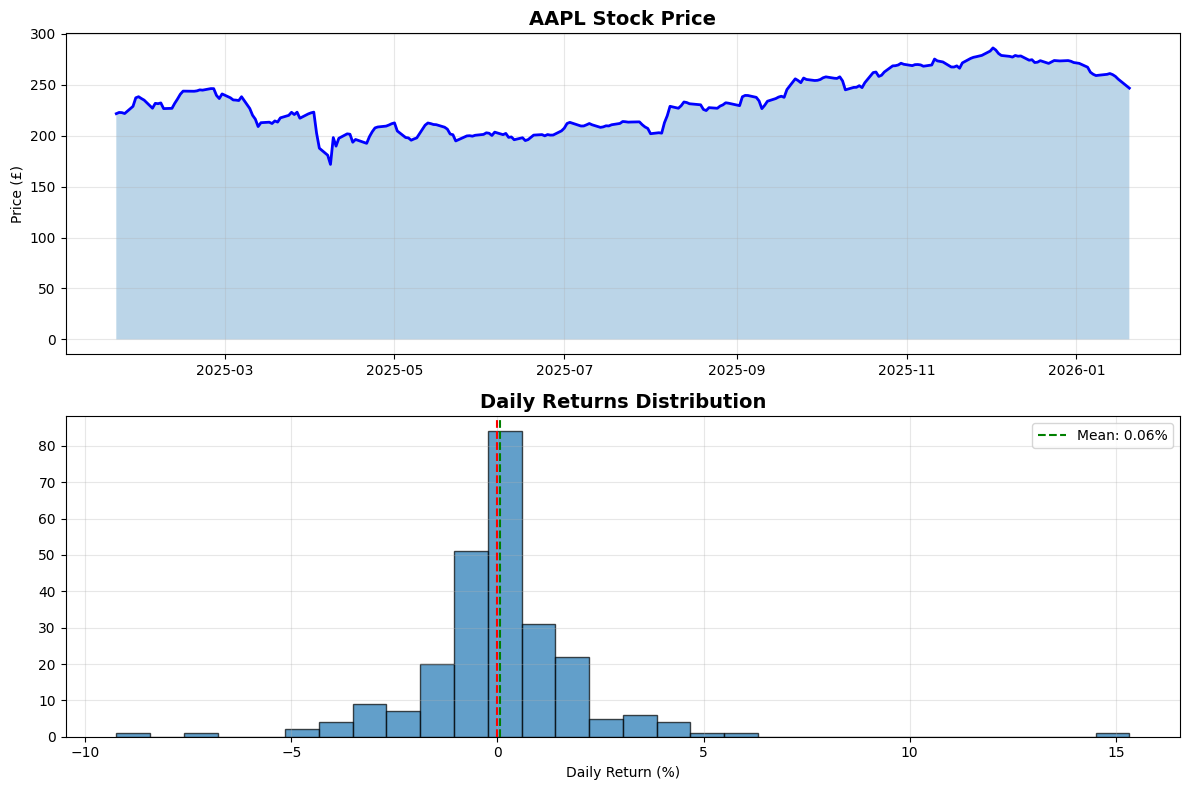


Analysis complete using yfinance library.


In [5]:
# Run Function 1
stock_portfolio_analyzer()

## Function 2: NPV Calculator
**Using: numpy_financial library**

In [6]:
def npv_calculator():
    """Calculates NPV and IRR using numpy_financial."""
    display_header("FUNCTION 2: NPV CALCULATOR")
    print("\nThis function calculates NPV and IRR using numpy_financial.\n")

    initial_investment = get_valid_input("Initial investment (£): ", "float", min_val=1)
    num_periods = get_valid_input("Number of years (1-30): ", "int", 1, 30)

    print("\n1. Uniform cash flows  2. Variable cash flows")
    cf_method = get_valid_input("Choice (1-2): ", "int", 1, 2)

    cash_flows = [-initial_investment]

    if cf_method == 1:
        annual_cf = get_valid_input("Annual cash flow (£): ", "float")
        cash_flows.extend([annual_cf] * num_periods)
    else:
        print("\nEnter cash flow for each year:")
        for year in range(1, num_periods + 1):
            cf = get_valid_input(f"Year {year} (£): ", "float")
            cash_flows.append(cf)

    discount_rate = get_valid_input("\nDiscount rate (%): ", "float", 0, 100) / 100

    npv_result = npf.npv(discount_rate, cash_flows)

    try:
        irr_result = npf.irr(cash_flows)
        irr_valid = irr_result is not None and not np.isnan(irr_result)
    except:
        irr_result, irr_valid = None, False

    cumulative = 0
    payback = None
    for i, cf in enumerate(cash_flows):
        cumulative += cf
        if cumulative >= 0 and payback is None and i > 0:
            prev = cumulative - cf
            payback = i - 1 + abs(prev) / cf

    pv_future = npv_result + initial_investment
    pi = pv_future / initial_investment if initial_investment > 0 else 0

    cf_data = []
    cumulative_pv = 0
    for i, cf in enumerate(cash_flows):
        pv_factor = 1 / ((1 + discount_rate) ** i)
        pv = cf * pv_factor
        cumulative_pv += pv
        cf_data.append({'Year': i, 'Cash Flow': cf, 'PV Factor': pv_factor, 'PV': pv, 'Cumulative': cumulative_pv})

    print("\n" + "=" * 60)
    print("                NPV ANALYSIS RESULTS")
    print("=" * 60)
    print(f"\nInitial Investment: £{initial_investment:,.2f}")
    print(f"Duration: {num_periods} years")
    print(f"Discount Rate: {discount_rate*100:.2f}%")

    print("\nCASH FLOW ANALYSIS:")
    print("-" * 60)
    print(f"{'Year':<6}{'Cash Flow':>12}{'PV Factor':>12}{'PV':>12}{'Cumulative':>14}")
    for row in cf_data:
        yr = "Init" if row['Year'] == 0 else f"Y{row['Year']}"
        print(f"{yr:<6}£{row['Cash Flow']:>10,.2f}{row['PV Factor']:>12.4f}£{row['PV']:>10,.2f}£{row['Cumulative']:>12,.2f}")

    print("\nKEY METRICS:")
    print("-" * 60)
    print(f"NPV: £{npv_result:,.2f}")
    if irr_valid:
        print(f"IRR: {irr_result*100:.2f}%")
    if payback:
        print(f"Payback Period: {payback:.2f} years")
    print(f"Profitability Index: {pi:.3f}")

    print("\nRECOMMENDATION:")
    if npv_result > 0:
        print("ACCEPT - NPV is positive, project adds value")
    elif npv_result < 0:
        print("REJECT - NPV is negative, project destroys value")
    else:
        print("INDIFFERENT - Project breaks even")

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    years = list(range(len(cash_flows)))
    colors = ['red' if cf < 0 else 'green' for cf in cash_flows]
    axes[0].bar(years, cash_flows, color=colors, edgecolor='black', alpha=0.7)
    axes[0].axhline(y=0, color='black', linewidth=0.5)
    axes[0].set_title('Cash Flows by Year', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Cash Flow (£)')
    axes[0].grid(True, alpha=0.3)

    cumulative_pvs = [row['Cumulative'] for row in cf_data]
    axes[1].plot(years, cumulative_pvs, 'b-o', linewidth=2, markersize=8)
    axes[1].axhline(y=0, color='red', linestyle='--')
    axes[1].fill_between(years, cumulative_pvs, alpha=0.3)
    axes[1].set_title('Cumulative Present Value', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Cumulative PV (£)')
    axes[1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nAnalysis complete using numpy_financial library.")

print("Function 2 loaded!")

Function 2 loaded!



  FUNCTION 2: NPV CALCULATOR

This function calculates NPV and IRR using numpy_financial.

Initial investment (£): 4000000
Number of years (1-30): 2

1. Uniform cash flows  2. Variable cash flows
Choice (1-2): 1
Annual cash flow (£): 20000

Discount rate (%): 10

                NPV ANALYSIS RESULTS

Initial Investment: £4,000,000.00
Duration: 2 years
Discount Rate: 10.00%

CASH FLOW ANALYSIS:
------------------------------------------------------------
Year     Cash Flow   PV Factor          PV    Cumulative
Init  £-4,000,000.00      1.0000£-4,000,000.00£-4,000,000.00
Y1    £ 20,000.00      0.9091£ 18,181.82£-3,981,818.18
Y2    £ 20,000.00      0.8264£ 16,528.93£-3,965,289.26

KEY METRICS:
------------------------------------------------------------
NPV: £-3,965,289.26
IRR: -92.67%
Profitability Index: 0.009

RECOMMENDATION:
REJECT - NPV is negative, project destroys value


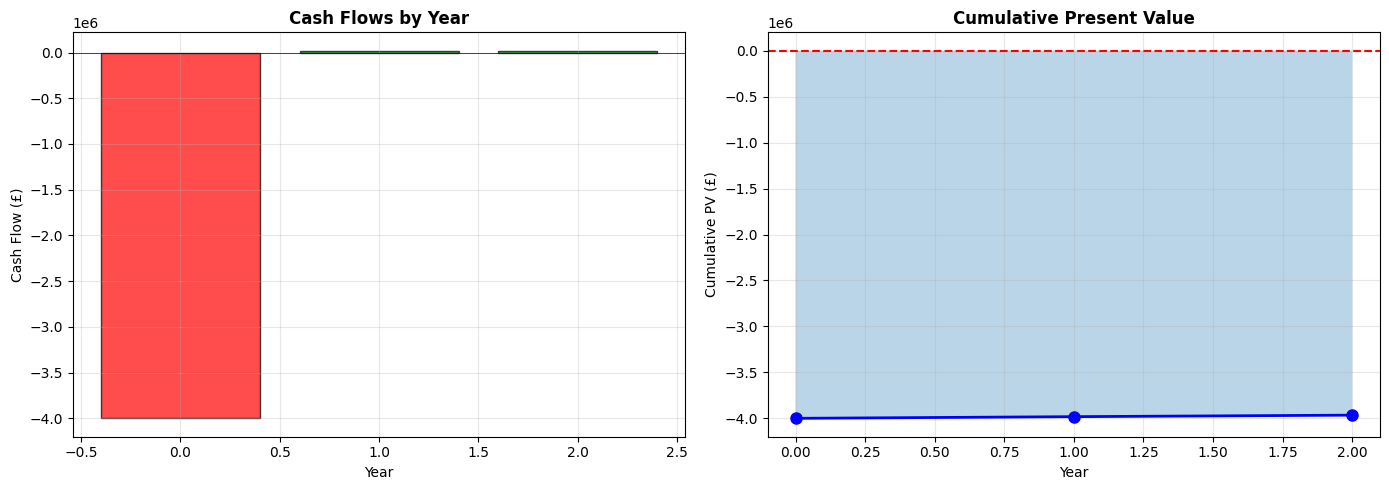


Analysis complete using numpy_financial library.


In [7]:
# Run Function 2
npv_calculator()

## Function 3: Loan Amortization Schedule
**Using: numpy_financial library**

In [8]:
def loan_amortization():
    """Generates loan amortization schedule using numpy_financial."""
    display_header("FUNCTION 3: LOAN AMORTIZATION SCHEDULE")
    print("\nThis function generates a loan repayment schedule using numpy_financial.\n")

    loan_amount = get_valid_input("Loan amount (£): ", "float", min_val=100)
    annual_rate = get_valid_input("Annual interest rate (%): ", "float", 0.1, 50)
    loan_term = get_valid_input("Loan term in years (1-40): ", "int", 1, 40)

    monthly_rate = annual_rate / 100 / 12
    total_payments = loan_term * 12

    monthly_payment = -npf.pmt(monthly_rate, total_payments, loan_amount)

    schedule = []
    balance = loan_amount
    total_interest = 0

    for month in range(1, total_payments + 1):
        interest = balance * monthly_rate
        principal = monthly_payment - interest
        balance = max(balance - principal, 0)
        total_interest += interest
        schedule.append({'Month': month, 'Payment': monthly_payment, 'Principal': principal, 'Interest': interest, 'Balance': balance})

    print("\n" + "=" * 60)
    print("               LOAN AMORTIZATION RESULTS")
    print("=" * 60)
    print(f"\nLoan Amount: £{loan_amount:,.2f}")
    print(f"Interest Rate: {annual_rate:.2f}%")
    print(f"Term: {loan_term} years ({total_payments} months)")
    print(f"\nMonthly Payment: £{monthly_payment:,.2f}")
    print(f"Total Payments: £{monthly_payment * total_payments:,.2f}")
    print(f"Total Interest: £{total_interest:,.2f}")
    print(f"Interest/Principal: {(total_interest/loan_amount)*100:.1f}%")

    print("\nYEARLY SUMMARY:")
    print("-" * 60)
    print(f"{'Year':<6}{'Principal':>14}{'Interest':>14}{'Balance':>14}")

    for year in range(1, loan_term + 1):
        start = (year - 1) * 12
        end = year * 12
        year_data = schedule[start:end]
        yr_principal = sum(r['Principal'] for r in year_data)
        yr_interest = sum(r['Interest'] for r in year_data)
        yr_balance = year_data[-1]['Balance']
        print(f"{year:<6}£{yr_principal:>12,.2f}£{yr_interest:>12,.2f}£{yr_balance:>12,.2f}")

    first_int_pct = (schedule[0]['Interest'] / monthly_payment) * 100
    last_int_pct = (schedule[-1]['Interest'] / monthly_payment) * 100
    print(f"\nFirst payment: {first_int_pct:.1f}% interest, {100-first_int_pct:.1f}% principal")
    print(f"Last payment: {last_int_pct:.1f}% interest, {100-last_int_pct:.1f}% principal")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    months = [r['Month'] for r in schedule]
    principals = [r['Principal'] for r in schedule]
    interests = [r['Interest'] for r in schedule]
    balances = [r['Balance'] for r in schedule]

    axes[0, 0].plot(months, balances, 'b-', linewidth=2)
    axes[0, 0].fill_between(months, balances, alpha=0.3)
    axes[0, 0].set_title('Remaining Balance', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Month')
    axes[0, 0].set_ylabel('Balance (£)')
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].stackplot(months, interests, principals, labels=['Interest', 'Principal'], alpha=0.7)
    axes[0, 1].set_title('Payment Breakdown', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Amount (£)')
    axes[0, 1].legend(loc='upper right')
    axes[0, 1].grid(True, alpha=0.3)

    axes[1, 0].pie([loan_amount, total_interest], labels=['Principal', 'Interest'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
    axes[1, 0].set_title('Total Payment Breakdown', fontsize=12, fontweight='bold')

    cum_principal = np.cumsum(principals)
    cum_interest = np.cumsum(interests)
    axes[1, 1].fill_between(months, cum_principal, label='Principal Paid', alpha=0.7)
    axes[1, 1].fill_between(months, cum_principal, cum_principal + cum_interest, label='Interest Paid', alpha=0.7)
    axes[1, 1].set_title('Cumulative Payments', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Cumulative Amount (£)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nSchedule generated using numpy_financial PMT function.")

print("Function 3 loaded!")

Function 3 loaded!



  FUNCTION 3: LOAN AMORTIZATION SCHEDULE

This function generates a loan repayment schedule using numpy_financial.

Loan amount (£): 20000
Annual interest rate (%): 5
Loan term in years (1-40): 10

               LOAN AMORTIZATION RESULTS

Loan Amount: £20,000.00
Interest Rate: 5.00%
Term: 10 years (120 months)

Monthly Payment: £212.13
Total Payments: £25,455.72
Total Interest: £5,455.72
Interest/Principal: 27.3%

YEARLY SUMMARY:
------------------------------------------------------------
Year       Principal      Interest       Balance
1     £    1,581.49£      964.08£   18,418.51
2     £    1,662.40£      883.17£   16,756.11
3     £    1,747.45£      798.12£   15,008.66
4     £    1,836.85£      708.72£   13,171.80
5     £    1,930.83£      614.74£   11,240.97
6     £    2,029.62£      515.96£    9,211.36
7     £    2,133.46£      412.12£    7,077.90
8     £    2,242.61£      302.96£    4,835.29
9     £    2,357.34£      188.23£    2,477.95
10    £    2,477.95£       67.62£       

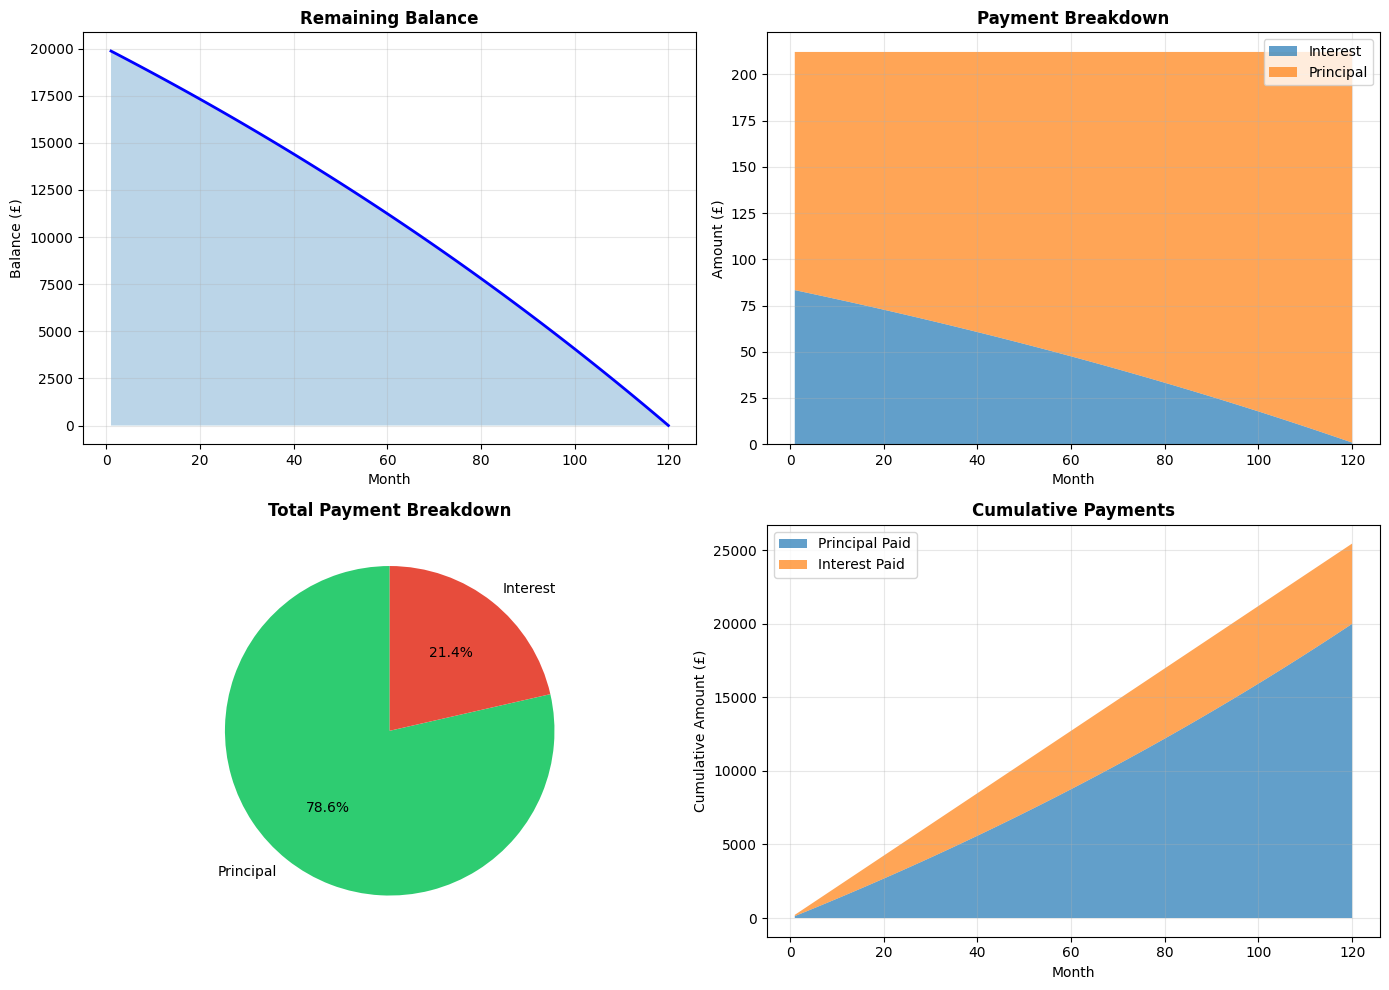


Schedule generated using numpy_financial PMT function.


In [9]:
# Run Function 3
loan_amortization()

## Function 4: Stock Price Comparison
**Using: yfinance + matplotlib libraries**

In [10]:
def stock_comparison():
    """Compares multiple stocks using yfinance and matplotlib."""
    display_header("FUNCTION 4: STOCK PRICE COMPARISON")
    print("\nThis function compares multiple stocks using yfinance and matplotlib.\n")

    print("Enter 2-4 stock tickers to compare (e.g., AAPL, MSFT, GOOGL)")
    num_stocks = get_valid_input("How many stocks (2-4): ", "int", 2, 4)

    tickers = []
    for i in range(num_stocks):
        ticker = get_valid_input(f"Ticker {i+1}: ").upper()
        tickers.append(ticker)

    print("\n1. 1 Month  2. 3 Months  3. 6 Months  4. 1 Year  5. 2 Years")
    period_choice = get_valid_input("Period (1-5): ", "int", 1, 5)
    period_map = {1: ("1mo", "1 Month"), 2: ("3mo", "3 Months"), 3: ("6mo", "6 Months"), 4: ("1y", "1 Year"), 5: ("2y", "2 Years")}
    period_code, period_name = period_map[period_choice]

    print(f"\nFetching data for {', '.join(tickers)}...")

    try:
        # Fetch data for each stock individually using Ticker.history()
        stock_data = {}
        valid_tickers = []

        for ticker in tickers:
            try:
                stock = yf.Ticker(ticker)
                data = stock.history(period=period_code)
                if not data.empty and 'Close' in data.columns:
                    # Extract Close prices as a Series
                    stock_data[ticker] = data['Close']
                    valid_tickers.append(ticker)
                    print(f"  - {ticker}: Data retrieved successfully")
                else:
                    print(f"  - Warning: No data found for {ticker}")
            except Exception as e:
                print(f"  - Warning: Could not fetch {ticker}: {e}")

        if len(valid_tickers) < 2:
            print("\nError: Need at least 2 valid stocks for comparison")
            return

        # Create combined DataFrame
        combined = pd.DataFrame(stock_data)
        combined = combined.dropna()

        if combined.empty or len(combined) < 2:
            print("\nError: Not enough overlapping data for comparison")
            return

        # Calculate returns
        returns = combined.pct_change().dropna()
        normalized = combined / combined.iloc[0] * 100

        # Display results
        print("\n" + "=" * 60)
        print("              STOCK COMPARISON RESULTS")
        print("=" * 60)
        print(f"\nPeriod: {period_name}")
        print(f"Date Range: {combined.index[0].strftime('%Y-%m-%d')} to {combined.index[-1].strftime('%Y-%m-%d')}")
        print(f"Trading Days: {len(combined)}")

        print("\nPRICE COMPARISON:")
        print("-" * 60)
        print(f"{'Ticker':<10}{'Start':>12}{'End':>12}{'Change':>12}{'Return':>12}")

        performance = []
        for t in valid_tickers:
            start = float(combined[t].iloc[0])
            end = float(combined[t].iloc[-1])
            change = end - start
            ret = (change / start) * 100
            performance.append({'Ticker': t, 'Return': ret})
            print(f"{t:<10}£{start:>10.2f}£{end:>10.2f}£{change:>10.2f}{ret:>11.2f}%")

        performance.sort(key=lambda x: x['Return'], reverse=True)
        print("\nRANKING:")
        for i, p in enumerate(performance, 1):
            medal = "[BEST]" if i == 1 else ""
            print(f"{i}. {p['Ticker']}: {p['Return']:+.2f}% {medal}")

        print("\nVOLATILITY:")
        print("-" * 60)
        for t in valid_tickers:
            daily_vol = returns[t].std() * 100
            annual_vol = daily_vol * np.sqrt(252)
            risk = "Low" if annual_vol < 20 else "Medium" if annual_vol < 40 else "High"
            print(f"{t}: Daily {daily_vol:.2f}%, Annual {annual_vol:.2f}% ({risk} risk)")

        # Correlation
        if len(valid_tickers) > 1:
            print("\nCORRELATION MATRIX:")
            corr = returns.corr()
            print(corr.round(3).to_string())

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Normalized prices
        for t in valid_tickers:
            axes[0, 0].plot(normalized.index, normalized[t], label=t, linewidth=2)
        axes[0, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.5)
        axes[0, 0].set_title('Normalized Prices (Base=100)', fontsize=12, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Cumulative returns
        cum_returns = (1 + returns).cumprod() - 1
        for t in valid_tickers:
            axes[0, 1].plot(cum_returns.index, cum_returns[t] * 100, label=t, linewidth=2)
        axes[0, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        axes[0, 1].set_title('Cumulative Returns (%)', fontsize=12, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Volatility bar chart
        vols = [returns[t].std() * 100 * np.sqrt(252) for t in valid_tickers]
        colors = ['green' if v < 20 else 'orange' if v < 40 else 'red' for v in vols]
        axes[1, 0].bar(valid_tickers, vols, color=colors, edgecolor='black', alpha=0.7)
        axes[1, 0].set_title('Annualized Volatility', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Volatility (%)')
        axes[1, 0].grid(True, alpha=0.3)

        # Return comparison
        rets = [(float(combined[t].iloc[-1]) - float(combined[t].iloc[0])) / float(combined[t].iloc[0]) * 100 for t in valid_tickers]
        colors = ['green' if r > 0 else 'red' for r in rets]
        axes[1, 1].bar(valid_tickers, rets, color=colors, edgecolor='black', alpha=0.7)
        axes[1, 1].axhline(y=0, color='black', linewidth=0.5)
        axes[1, 1].set_title('Total Return (%)', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('Return (%)')
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print("\n" + "=" * 60)
        print("Comparison complete using yfinance and matplotlib.")

    except Exception as e:
        print(f"\nError: {str(e)}")
        import traceback
        traceback.print_exc()

print("Function 4 loaded!")

Function 4 loaded!



  FUNCTION 4: STOCK PRICE COMPARISON

This function compares multiple stocks using yfinance and matplotlib.

Enter 2-4 stock tickers to compare (e.g., AAPL, MSFT, GOOGL)
How many stocks (2-4): TSLA
Error: Invalid input. Please try again.
How many stocks (2-4): AAPL
Error: Invalid input. Please try again.
How many stocks (2-4): 3
Ticker 1: AAPL
Ticker 2: TSLA
Ticker 3: GOOGL

1. 1 Month  2. 3 Months  3. 6 Months  4. 1 Year  5. 2 Years
Period (1-5): 2

Fetching data for AAPL, TSLA, GOOGL...
  - AAPL: Data retrieved successfully
  - TSLA: Data retrieved successfully
  - GOOGL: Data retrieved successfully

              STOCK COMPARISON RESULTS

Period: 3 Months
Date Range: 2025-10-21 to 2026-01-20
Trading Days: 62

PRICE COMPARISON:
------------------------------------------------------------
Ticker           Start         End      Change      Return
AAPL      £    262.52£    246.70£    -15.82      -6.02%
TSLA      £    442.60£    419.25£    -23.35      -5.28%
GOOGL     £    250.30£    3

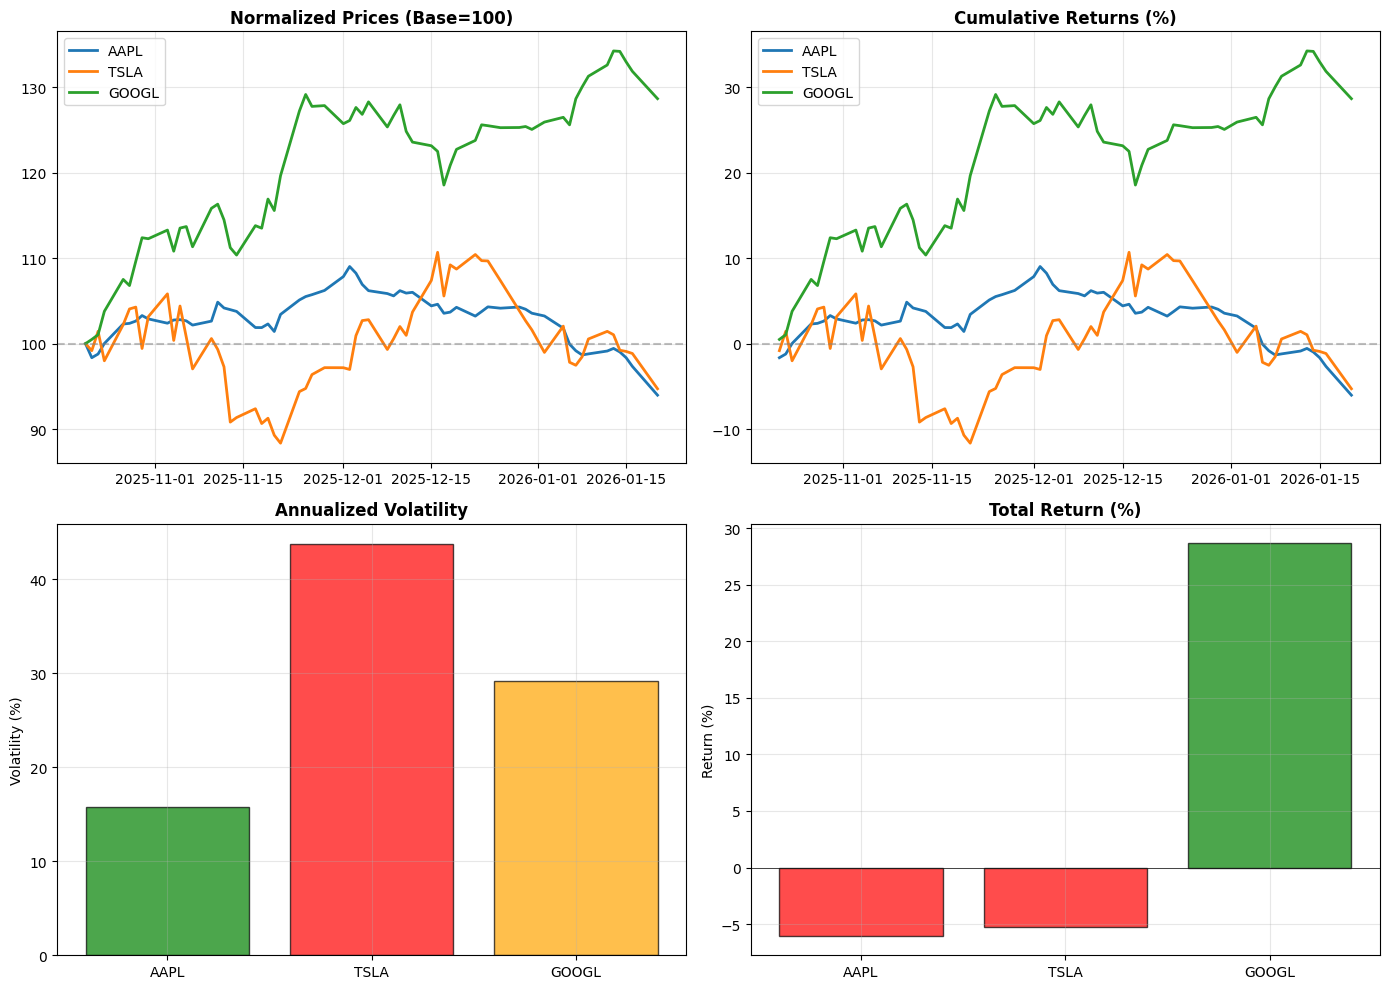


Comparison complete using yfinance and matplotlib.


In [11]:
# Run Function 4
stock_comparison()

---
## Main Menu System
Run the cell below to start the interactive menu-driven application.

In [12]:
def display_main_menu():
    """Displays the main menu."""
    print("\n" + "=" * 60)
    print("       FINTECH PROTOTYPE - MAIN MENU")
    print("=" * 60)
    print("""
    [1] Stock Portfolio Analyzer (yfinance)
    [2] NPV Calculator (numpy_financial)
    [3] Loan Amortization (numpy_financial)
    [4] Stock Comparison (yfinance + matplotlib)
    [5] Exit
    """)
    print("=" * 60)

def main():
    """Main function with menu loop."""
    print("\n" + "*" * 60)
    print("       WELCOME TO THE FINTECH PROTOTYPE              ")
    print("*" * 60)
    print("\nLibraries: yfinance, numpy_financial, pandas, matplotlib")

    running = True
    while running:
        display_main_menu()
        choice = get_valid_input("Enter your choice (1-5): ", "int", 1, 5)

        if choice == 1:
            stock_portfolio_analyzer()
        elif choice == 2:
            npv_calculator()
        elif choice == 3:
            loan_amortization()
        elif choice == 4:
            stock_comparison()
        elif choice == 5:
            print("\nThank you for using the FinTech Prototype!")
            running = False
            continue

        if running:
            running = continue_or_exit()

    print("\nApplication terminated.")

print("Main menu system loaded!")

Main menu system loaded!



************************************************************
       WELCOME TO THE FINTECH PROTOTYPE              
************************************************************

Libraries: yfinance, numpy_financial, pandas, matplotlib

       FINTECH PROTOTYPE - MAIN MENU

    [1] Stock Portfolio Analyzer (yfinance)
    [2] NPV Calculator (numpy_financial)
    [3] Loan Amortization (numpy_financial)
    [4] Stock Comparison (yfinance + matplotlib)
    [5] Exit
    
Enter your choice (1-5): 1

  FUNCTION 1: STOCK PORTFOLIO ANALYZER

This function analyzes stock performance using yfinance.

Enter a stock ticker (e.g., AAPL, GOOGL, MSFT, TSLA)
Stock Ticker: AAPL

Select analysis period:
1. 1 Month  2. 3 Months  3. 6 Months  4. 1 Year  5. 2 Years
Enter choice (1-5): 3

Initial investment (£): 70000

Fetching data for AAPL...

                 PORTFOLIO ANALYSIS RESULTS

Company: Apple Inc. (AAPL)
Sector: Technology

Period: 2025-07-21 to 2026-01-20

Starting Price: £212.03
Current Price:  

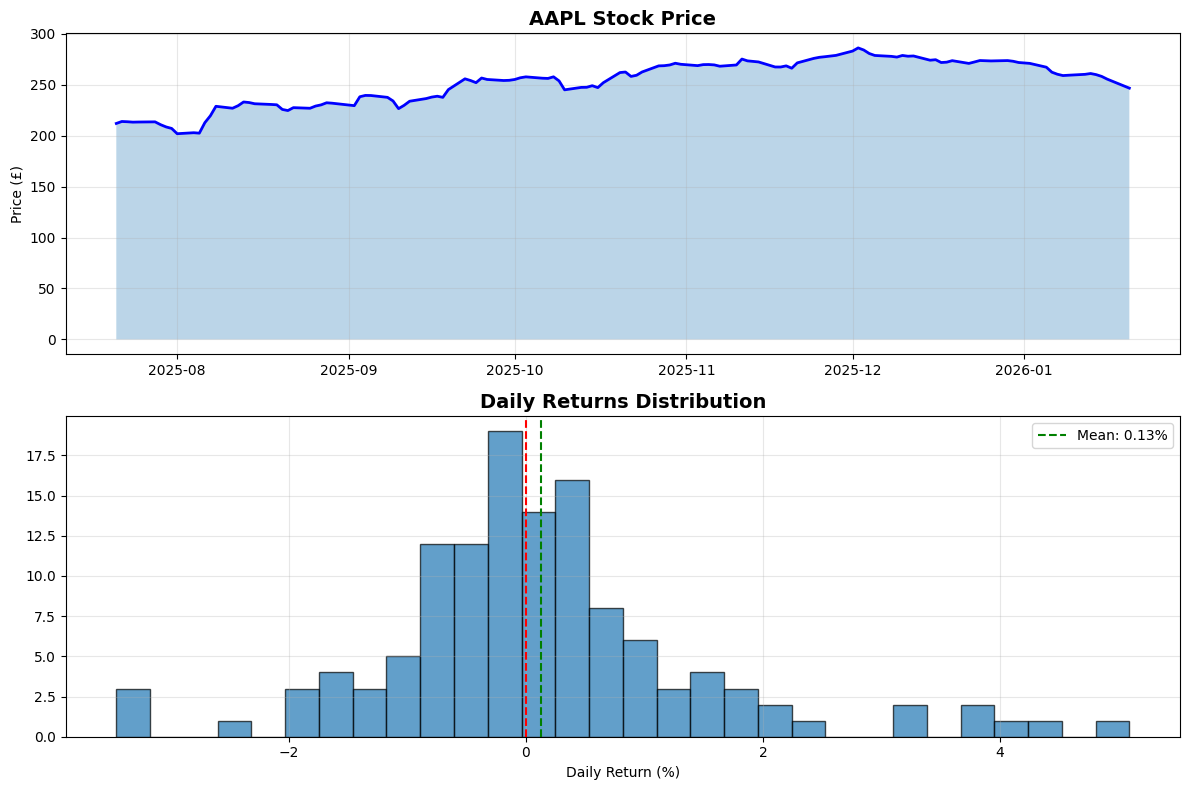


Analysis complete using yfinance library.

----------------------------------------


In [ ]:
# Run the main application
main()